### Fourier Transform ###

The fourier transform provides the spectrum of frequencies in an image.
It can be useful in order to identify characteristics of images.
For example: letters can be indentified by their characteristic spectrum, even in different fonts.

In [1]:
import numpy as np
import cv2

In [2]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [3]:
img1 = cv2.imread('lines_img1.png')
img2 = cv2.imread('lines_img2.png')

In [4]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [ ]:
f1 = np.fft.fft2(img1_gray)
f1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20*np.log(np.abs(f1))
magnitude_spectrum1 = magnitude_spectrum1.astype('uint8')

f2 = np.fft.fft2(img2_gray)
f2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(f2))
magnitude_spectrum2 = magnitude_spectrum2.astype('uint8')

magnitude_spectrum1 = cv2.cvtColor(magnitude_spectrum1, cv2.COLOR_GRAY2BGR)
magnitude_spectrum2 = cv2.cvtColor(magnitude_spectrum2, cv2.COLOR_GRAY2BGR)

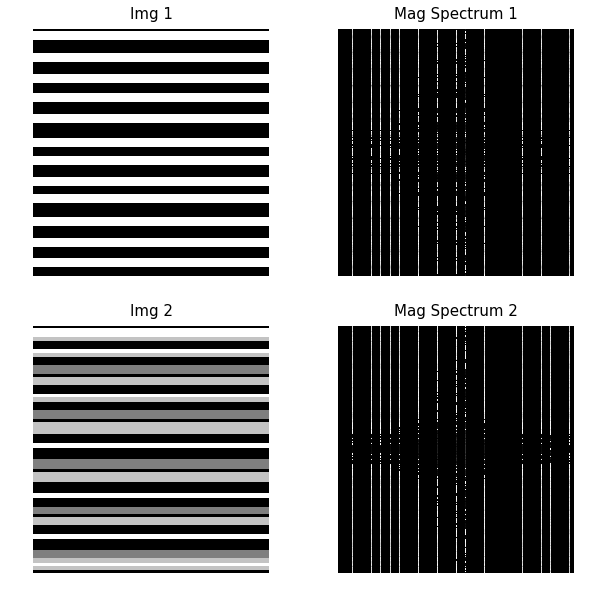

In [6]:
OpCV_Utils.show_multiple_imgs_plt([[img1, magnitude_spectrum1], [img2, magnitude_spectrum2]], 
                                  [['Img 1', 'Mag Spectrum 1'], ['Img 2', 'Mag Spectrum 2']], fig_size=(10,10))

In [7]:
def imgFourierTransform(img):
    
    # Convert img to gray:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Compute the 2D-FFT:
    fft = np.fft.fft2(img_gray)
    
    # Get the phase spectrum:
    phase_spectrum = np.angle(fft)
    
    # Shift adjust low frequencies to the center (phase info is lost) and get magnitude:
    fft_shifted = np.fft.fftshift(fft)
    magnitude_spectrum = 20*np.log(np.abs(fft_shifted))
    
    # Adjust imgs to output:
    magnitude_spectrum = magnitude_spectrum.astype('uint8')
    magnitude_spectrum = cv2.cvtColor(magnitude_spectrum, cv2.COLOR_GRAY2RGB)
    
    phase_spectrum = phase_spectrum.astype('uint8')
    phase_spectrum = cv2.cvtColor(phase_spectrum, cv2.COLOR_GRAY2RGB)
    
    return fft, magnitude_spectrum, phase_spectrum

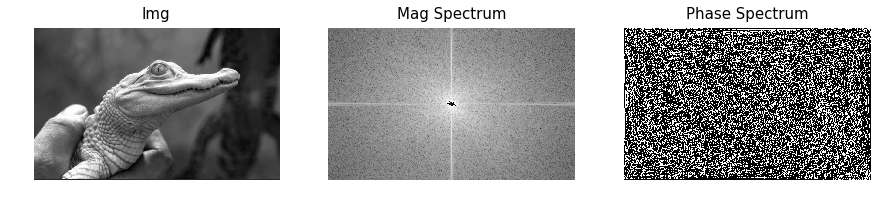

In [8]:
img = cv2.imread('baby_gator.png')

img_fft, magnitude_spectrum, phase_spectrum = imgFourierTransform(img)

img_gray = cv2.cvtColor(img[:,:,0], cv2.COLOR_GRAY2RGB)
OpCV_Utils.show_multiple_imgs_plt([[img_gray, magnitude_spectrum, phase_spectrum]], 
                                  [['Img', 'Mag Spectrum', 'Phase Spectrum']], fig_size=(15,10))

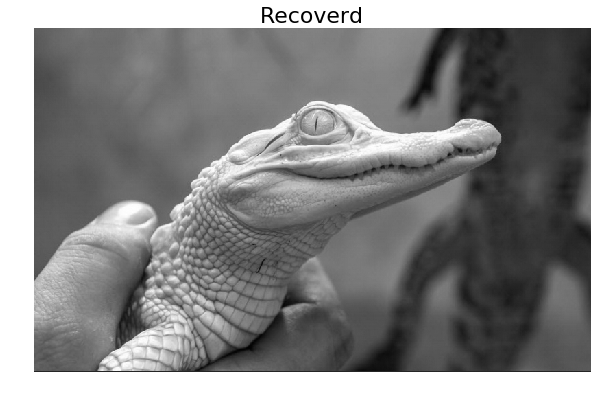

In [9]:
# Let's recover img from the fft using the inverse fft:
img_recovered = np.abs(np.fft.ifft2(img_fft))

# Convert to show:
img_recovered = img_recovered.astype('uint8')
img_recovered = cv2.cvtColor(img_recovered, cv2.COLOR_GRAY2RGB)

OpCV_Utils.show_single_img_plt(img_recovered, 'Recoverd', fig_size=(10,10))

In [10]:
def invImgFourierTransform(fft):
    # Recover img from the fft using the inverse fft:
    img_recovered = np.abs(np.fft.ifft2(fft))

    # Convert to show:
    img_recovered = img_recovered.astype('uint8')
    img_recovered = cv2.cvtColor(img_recovered, cv2.COLOR_GRAY2RGB)
    
    return img_recovered

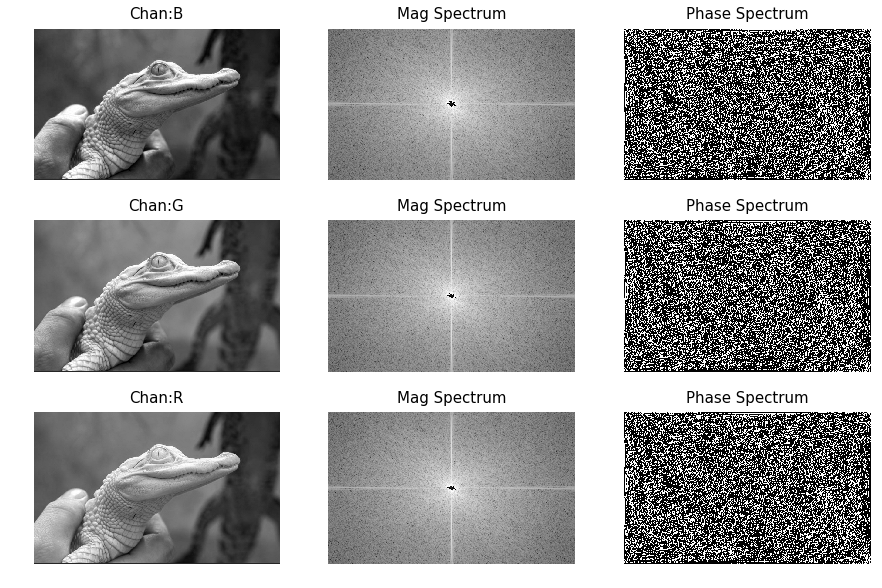

In [11]:
chans = cv2.split(img)

colors = ('B', 'G', 'R')

imgs = []
titles = []

for chan, color in zip(chans, colors):
    
    # Compute the FFT and adjust low frequencies to the middle:
    f = np.fft.fft2(chan)
    phase_spectrum = np.angle(f)
    
    f = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(f))
    
    # Adjust imgs to output:
    magnitude_spectrum = magnitude_spectrum.astype('uint8')
    magnitude_spectrum = cv2.cvtColor(magnitude_spectrum, cv2.COLOR_GRAY2RGB)
    
    phase_spectrum = phase_spectrum.astype('uint8')
    phase_spectrum = cv2.cvtColor(phase_spectrum, cv2.COLOR_GRAY2RGB)
    
    chan = cv2.cvtColor(chan, cv2.COLOR_GRAY2RGB)
    
    imgs.append([chan, magnitude_spectrum, phase_spectrum])
    titles.append([('Chan:' + color), 'Mag Spectrum', 'Phase Spectrum'])
    
    
OpCV_Utils.show_multiple_imgs_plt(imgs, titles, fig_size=(15,10)) 

#### Testing with Filters ####

##### Gaussian 

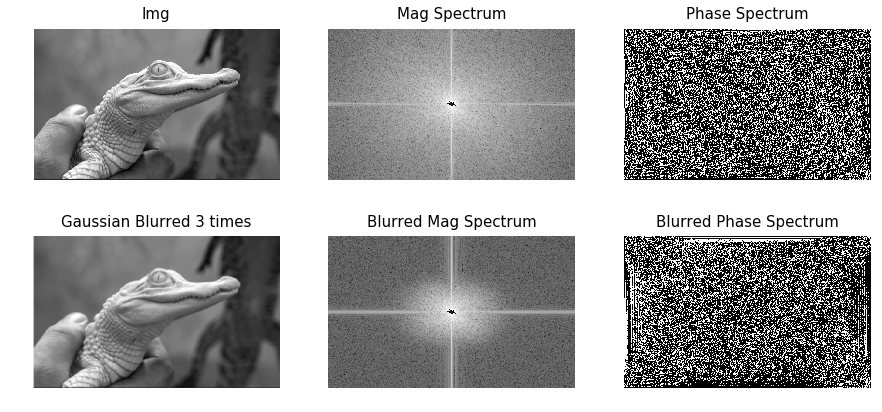

In [13]:
img = cv2.imread('baby_gator.png')
fft, magnitude_spectrum1, phase_spectrum1 = imgFourierTransform(img)

img_gray = cv2.cvtColor(img[:,:,1], cv2.COLOR_GRAY2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_img, (3, 3), 1)

for i in range(3):
    blurred = cv2.GaussianBlur(blurred, (3,3), 1)

# Compute the FFT and adjust low frequencies to the middle:
f = np.fft.fft2(blurred)
phase_spectrum2 = np.angle(f)

f = np.fft.fftshift(f)
magnitude_spectrum2 = 20*np.log(np.abs(f))
    
blurred = cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB)

# Adjust imgs to output:
magnitude_spectrum2 = magnitude_spectrum2.astype('uint8')
magnitude_spectrum2 = cv2.cvtColor(magnitude_spectrum2, cv2.COLOR_GRAY2RGB)
    
phase_spectrum2 = phase_spectrum2.astype('uint8')
phase_spectrum2 = cv2.cvtColor(phase_spectrum2, cv2.COLOR_GRAY2RGB)

OpCV_Utils.show_multiple_imgs_plt([[img_gray, magnitude_spectrum1, phase_spectrum1],
                                   [blurred, magnitude_spectrum2, phase_spectrum2]], 
                                  [['Img', 'Mag Spectrum', 'Phase Spectrum'],
                                   ['Gaussian Blurred {} times'.format(i+1), 'Blurred Mag Spectrum', 'Blurred Phase Spectrum']],
                                   fig_size=(15,7))

##### Scharr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(501, 814)


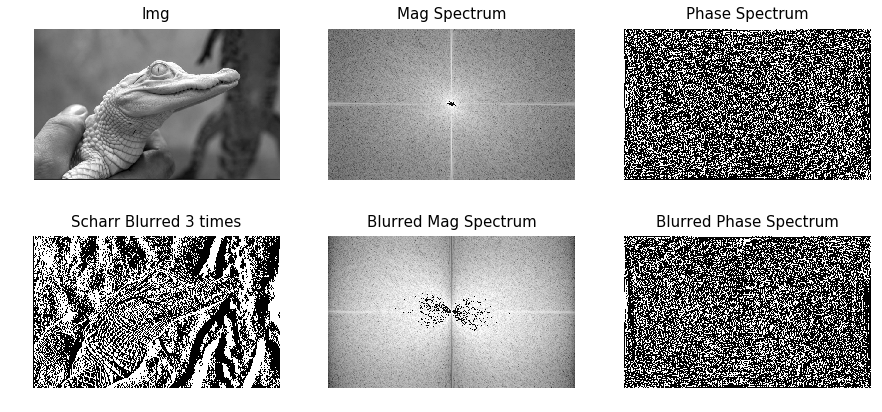

In [14]:
img = cv2.imread('baby_gator.png')
fft, magnitude_spectrum1, phase_spectrum1 = imgFourierTransform(img)

img_gray = cv2.cvtColor(img[:,:,1], cv2.COLOR_GRAY2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
scharr_blurred = cv2.Scharr(gray_img, cv2.CV_32F, 1, 0)

for i in range(0):
    scharr_blurred = cv2.Scharr(gray_img, cv2.CV_32F, 1, 0)

# Compute the FFT and adjust low frequencies to the middle:
f = np.fft.fft2(scharr_blurred)
phase_spectrum2 = np.angle(f)

f = np.fft.fftshift(f)
magnitude_spectrum2 = 20*np.log(np.abs(f))

print(scharr_blurred.shape)
    
scharr_blurred = cv2.cvtColor(scharr_blurred, cv2.COLOR_GRAY2RGB)

# Adjust imgs to output:
magnitude_spectrum2 = magnitude_spectrum2.astype('uint8')
magnitude_spectrum2 = cv2.cvtColor(magnitude_spectrum2, cv2.COLOR_GRAY2RGB)
    
phase_spectrum2 = phase_spectrum2.astype('uint8')
phase_spectrum2 = cv2.cvtColor(phase_spectrum2, cv2.COLOR_GRAY2RGB)

OpCV_Utils.show_multiple_imgs_plt([[img_gray, magnitude_spectrum1, phase_spectrum1],
                                   [scharr_blurred, magnitude_spectrum2, phase_spectrum2]], 
                                  [['Img', 'Mag Spectrum', 'Phase Spectrum'],
                                   ['Scharr Blurred {} times'.format(i+1), 'Blurred Mag Spectrum', 'Blurred Phase Spectrum']],
                                   fig_size=(15,7))

#### Testing with Letters #####

In [15]:
import glob
images = glob.glob('letters/*')

In [16]:
imgs_array = []
titles_array = []

for i, img_path in enumerate(images):
    
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    f1 = np.fft.fft2(img_gray)
    f1 = np.fft.fftshift(f1)
    magnitude_spectrum = 20*np.log(np.abs(f1))
    magnitude_spectrum = magnitude_spectrum.astype('uint8')

    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
    magnitude_spectrum = cv2.cvtColor(magnitude_spectrum, cv2.COLOR_GRAY2RGB)
    
    imgs_array.append([img_gray, magnitude_spectrum])
    titles_array.append(['',''])    

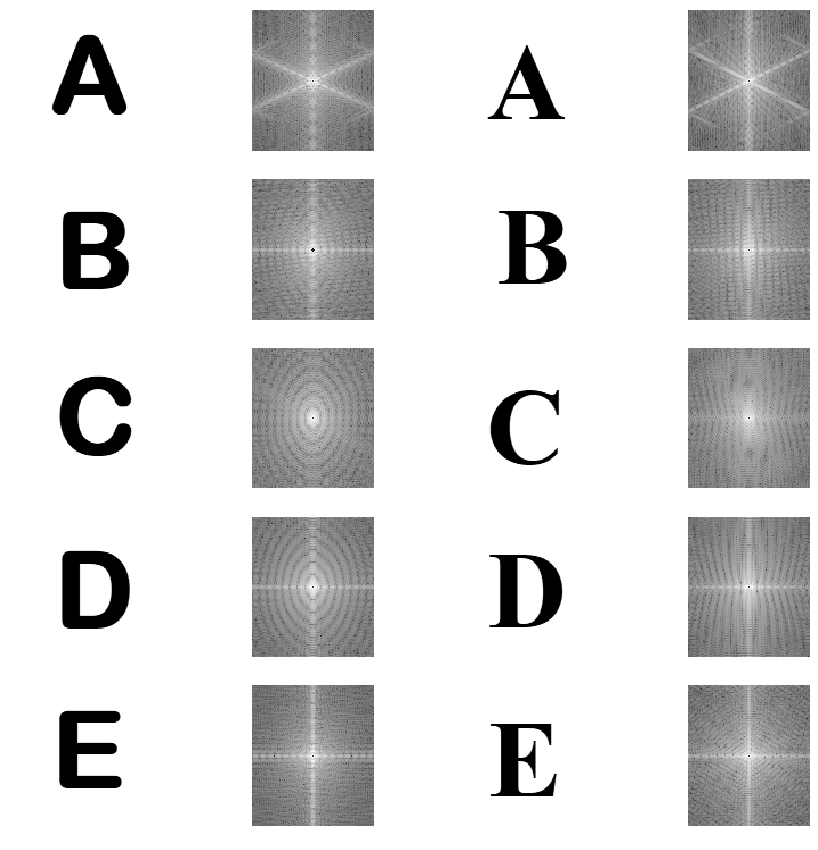

In [17]:
imgs = [[imgs_array[0][0], imgs_array[0][1], imgs_array[1][0], imgs_array[1][1]],
        [imgs_array[2][0], imgs_array[2][1], imgs_array[3][0], imgs_array[3][1]], 
        [imgs_array[4][0], imgs_array[4][1], imgs_array[5][0], imgs_array[5][1]],
        [imgs_array[6][0], imgs_array[6][1], imgs_array[7][0], imgs_array[7][1]],
        [imgs_array[8][0], imgs_array[8][1], imgs_array[9][0], imgs_array[9][1]]]

titles = [[titles_array[0][0], titles_array[0][1], titles_array[1][0], titles_array[1][1]],
          [titles_array[2][0], titles_array[2][1], titles_array[3][0], titles_array[3][1]], 
          [titles_array[4][0], titles_array[4][1], titles_array[5][0], titles_array[5][1]],
          [titles_array[6][0], titles_array[6][1], titles_array[7][0], titles_array[7][1]],
          [titles_array[8][0], titles_array[8][1], titles_array[9][0], titles_array[9][1]]]

OpCV_Utils.show_multiple_imgs_plt(imgs, titles, fig_size=(15,15))